In [128]:
import pandas as pd 
import missingno as msno 
import numpy as np 
import seaborn as sms
from datetime import datetime as dt 
import matplotlib.pyplot as plt
import plotly.express as px 
from dash import Dash, dcc, html, Input, Output
import sklearn

# Récupération du csv 

In [129]:
pd.options.display.max_columns = 150 
pd.options.display.max_rows = 150 

In [130]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Nettoyage du DF 

<AxesSubplot:>

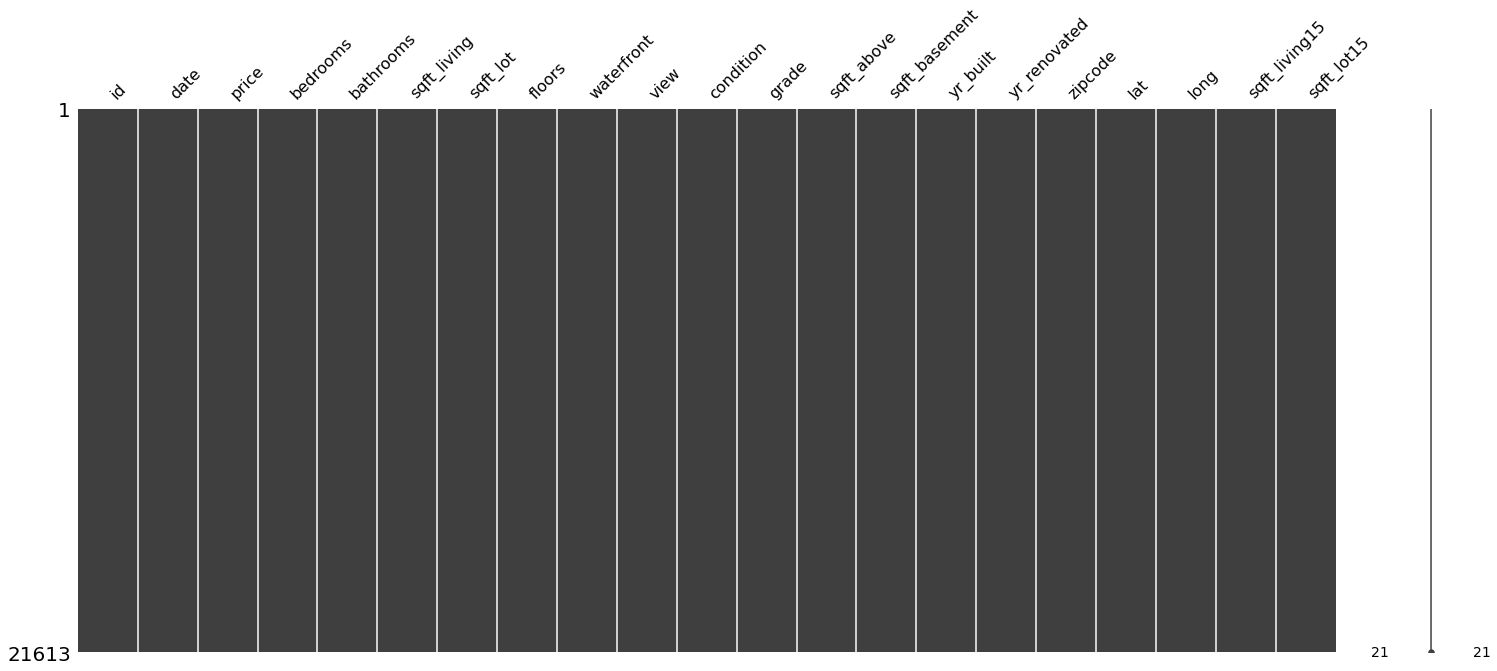

In [131]:
msno.matrix(df) #vérifie si il ya des valeurs manquantes 
# OU df.info #vérifier si il ya des valeurs manquantes 

### Supprimer les doublons 

In [132]:
df.loc[df.duplicated(keep=False),:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [133]:
df.loc[df['id'].duplicated(keep=False),:] #vérifier qu'une valeure ID  n'est pas présente deux fois 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


### Verifier les valeurs uniques et la description de chaque colonne 

In [134]:
print(df['sqft_living15'].unique())

[1340 1690 2720 1360 1800 4760 2238 1650 1780 2390 2210 1330 1370 2140
 1890 1610 1060 1280 1400 4110 2240 1220 2200 1030 1760 1860 1520 2630
 2580 1390 1460 1570 2020 1590 2160 1730 1290 2620 2470 2410 3625 1580
 3050 1228 2680  970 1190 1990 1410 1480 2730 1950 2250 2690 2960 2270
 2570 2500 1440 2750 2221 1010 3390 3530 1640 1510 2420 1940 3240 1680
  890 1130 3350 2350 1870 1720 1850 1900 1980 2520 1350 1750 1160 2550
 2370 1240 1270 2990 1380 1540 2090 2640 1830 1620 1880 2340 1710 2700
 3060 2660 1700 1970 1420 2060 2480 1550 1170 2820 1560 2230 2840 1450
 1500 3160 1200 3400 2110 2920 1770 1070 1930 3740 2260 1670 2290 1050
 2540 2190 2030 1230 2330 1300 1430 2770 1250 1630 2590 2130 1100 3836
 1320 2120 3070 1910 2080 1960 2280 1150 3430 2070 2600  830 1260 3120
 2010 1660 1600 2380 3890 4180 2653 2670 3920 2300 2310 2320 3150 1740
 2400 4550 2510 2440 2880 3860 2150 1310 1820 3080  880 2560 3470 1020
 2040 2610 1810 2860 3480 3130 3360 4050 2450 1790 3180 3600 2000 2430
 2850 

In [135]:
print(df['sqft_living15'].describe())

count    21613.000000
mean      1986.552492
std        685.391304
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64


### Ajout des colonnes date au bon format 

In [136]:
df['price_log'] = np.log(df['price'])
df['price_log']

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21608    12.793859
21609    12.899220
21610    12.904459
21611    12.899220
21612    12.691580
Name: price_log, Length: 21613, dtype: float64

In [137]:
df['date_sale'] = pd.to_datetime(df['date']) # ajouter une colonne date avec un bon format 

In [138]:
df['year'] = df['date_sale'].dt.year
df['month'] = df['date_sale'].dt.month   #AJOUT 3 COLONNES ANNEE MOIS ET JOUR
df['day'] = df['date_sale'].dt.day

### Changer le zipcode en objet pour utiliser get_dummies

In [139]:
#df['zipcode'].value_counts()  


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  object        
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [141]:
data_types_dict = {'zipcode': str} 
df = df.astype(data_types_dict)  # changer le zipcode de int à object 
df.dtypes

id                        int64
date                     object
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price_log               float64
date_sale        datetime64[ns]
year                      int64
month                     int64
day                       int64
dtype: object

In [142]:
df = pd.get_dummies(df)

### Supprimer la colonne id ainsi que les valeurs aberrantes

In [143]:
df = df.drop(['id'], axis=1) 

In [144]:
df = df[df['bedrooms'] != 0]  # pour supprimer les maisons avec 0 chambre
df = df[df['bathrooms'] != 0] # pour supprimer les maisons avec 0 sdb
df = df[df['bedrooms'] != 33]  # pour supprimer les maisons avec 33 chambre
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price_log,date_sale,year,month,day,date_20140502T000000,date_20140503T000000,date_20140504T000000,date_20140505T000000,date_20140506T000000,date_20140507T000000,date_20140508T000000,date_20140509T000000,date_20140510T000000,date_20140511T000000,date_20140512T000000,date_20140513T000000,date_20140514T000000,date_20140515T000000,date_20140516T000000,date_20140517T000000,date_20140518T000000,date_20140519T000000,date_20140520T000000,date_20140521T000000,date_20140522T000000,date_20140523T000000,date_20140524T000000,date_20140525T000000,date_20140526T000000,date_20140527T000000,date_20140528T000000,date_20140529T000000,date_20140530T000000,date_20140531T000000,date_20140601T000000,date_20140602T000000,date_20140603T000000,date_20140604T000000,date_20140605T000000,date_20140606T000000,date_20140607T000000,date_20140608T000000,date_20140609T000000,date_20140610T000000,date_20140611T000000,date_20140612T000000,date_20140613T000000,date_20140614T000000,date_20140615T000000,date_20140616T000000,date_20140617T000000,date_20140618T000000,date_20140619T000000,date_20140620T000000,date_20140621T000000,date_20140622T000000,...,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,12.309982,2014-10-13,2014,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,13.195614,2014-12-09,2014,12,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,12.100712,2015-02-25,2015,2,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,13.311329,2014-12-09,2014,12,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,13.142166,2015-02-18,2015,2,18,0,0,0,0,0,0,0,0,0,

### Créer une liste de corrélation en fonction du prix et les trier dans l'ordre (valeurs sont entre -1 et 1)

In [145]:
correlation = df.corrwith(df.price).sort_values(ascending= False )
correlation

price            1.000000
price_log        0.891720
sqft_living      0.701921
grade            0.667935
sqft_above       0.605395
                   ...   
zipcode_98002   -0.080357
zipcode_98168   -0.091732
zipcode_98001   -0.091983
zipcode_98042   -0.100384
zipcode_98023   -0.106178
Length: 464, dtype: float64

In [146]:
col_liste = ['price',            
'price_log' ,       
'sqft_living' ,    
'grade' ,           
'sqft_above' ,      
'sqft_living15' ,  
'bathrooms' ,       
'view' ,            
'sqft_basement' ,   
'bedrooms' ,        
'lat' ,             
'zipcode_98004' ,  
'waterfront' ,      
'floors' ,          
'zipcode_98039' ,   
'zipcode_98040' ,
'zipcode_98112' ,     
'zipcode_98006' ,   
'yr_renovated' ,   
'zipcode_98033' ,   
'zipcode_98105' ,  
'sqft_lot',         
'zipcode_98075',    
'zipcode_98199',    
'sqft_lot15',
'zipcode_98001',   
'zipcode_98042'   
,'zipcode_98023', 'long' ]

In [147]:
df = df [col_liste]

#### AUTRE METHODE: Créer une liste qui va contenir les correlations entre 0.3 et 1 et entre -0.3 et -1

In [148]:
""" liste = df.corrwith(df.price).tolist()
liste_index = df.corrwith(df.price).index
liste_index2 = list(liste_index)
liste_colonne_exacte = [x for x in liste if x > 0.3] #méthode liste par compréhension """


' liste = df.corrwith(df.price).tolist()\nliste_index = df.corrwith(df.price).index\nliste_index2 = list(liste_index)\nliste_colonne_exacte = [x for x in liste if x > 0.3] #méthode liste par compréhension '

## Partie visualisation des données 

price / sqft_living


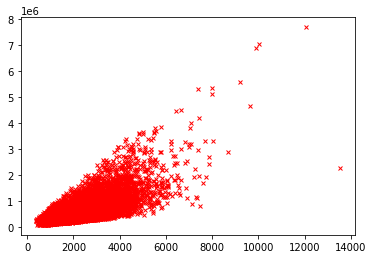

price / grade


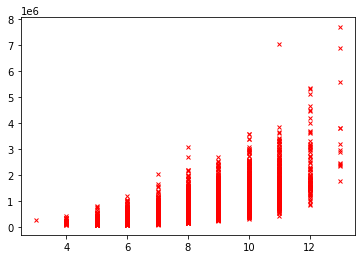

price / sqft_above


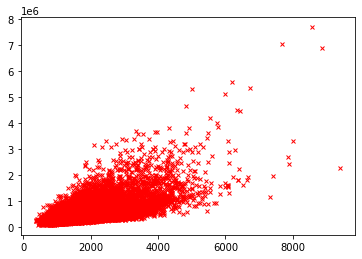

price / sqft_living15


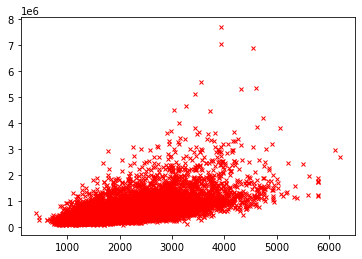

price / bathrooms


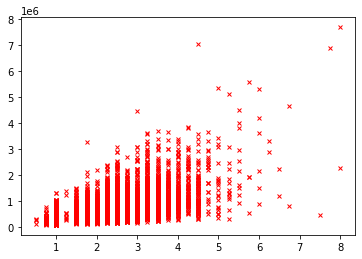

price / view


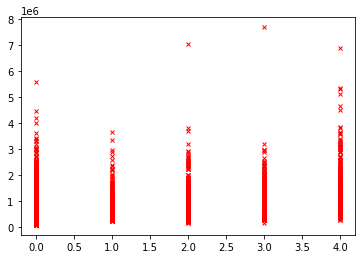

price / bedrooms


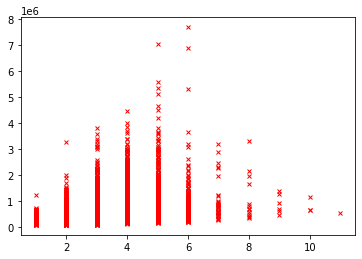

In [149]:
# COMMENT METTRE DES TITRES ABSCISSE ET ORDONNEE
for index in df:
    if index in ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "bedrooms"]:
        print("price / " + index)
        plt.plot(df[index], df['price'], 'rx', markersize=4) 
        plt.show()

In [150]:
df

,price,price_log,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,zipcode_98004,waterfront,floors,zipcode_98039,zipcode_98040,zipcode_98112,zipcode_98006,yr_renovated,zipcode_98033,zipcode_98105,sqft_lot,zipcode_98075,zipcode_98199,sqft_lot15,zipcode_98001,zipcode_98042,zipcode_98023,long
0,221900.0,12.309982,1180,7,1180,1340,1.00,0,0,3,47.5112,0,0,1.0,0,0,0,0,0,0,0,5650,0,0,5650,0,0,0,-122.257
1,538000.0,13.195614,2570,7,2170,1690,2.25,0,400,3,47.7210,0,0,2.0,0,0,0,0,1991,0,0,7242,0,0,7639,0,0,0,-122.319
2,180000.0,12.100712,770,6,770,2720,1.00,0,0,2,47.7379,0,0,1.0,0,0,0,0,0,0,0,10000,0,0,8062,0,0,0,-122.233
3,604000.0,13.311329,1960,7,1050,1360,3.00,0,910,4,47.5208,0,0,1.0,0,0,0,0,0,0,0,5000,0,0,5000,0,0,0,-122.393
4,510000.0,13.142166,1680,8,1680,1800,2.00,0,0,3,47.6168,0,0,1.0,0,0,0,0,0,0,0,8080,0,0,7503,0,0,0,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,12.793859,1530,8,1530,1530,2.50,0,0,3,47.6993,0,0,3.0,0,0,0,0,0,0,0,1131,0,0,1509,0,0,0,-122.346
21609,400000.0,12.899220,2310,8,2310,1830,2.50,0,0,4,47.5107,0,0,2.0,0,0,0,0,0,0,0,5813,0,0,7200,0,0,0,-122.362
21610,402101.0,12.904459,1020,7,1020,1020,0.75,0,0,2,47.5944,0,0,2.0,0,0,0,0,0,0,0,1350,0,0,2007,0,0,0,-122.299
21611,400000.0,12.899220,1600,8,1600,1410,2.50,0,0,3,47.5345,0,0,2.0,0,0,0,0,0,0,0,2388,0,0,1287,0,0,0,-122.069


In [151]:
# enregistre le fichier notebook 
# trier le DF en 80/10/10
# utiliser la méthode de regression linéaire pour faire un modéle 

In [152]:
df.corr()

,price,price_log,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,zipcode_98004,waterfront,floors,zipcode_98039,zipcode_98040,zipcode_98112,zipcode_98006,yr_renovated,zipcode_98033,zipcode_98105,sqft_lot,zipcode_98075,zipcode_98199,sqft_lot15,zipcode_98001,zipcode_98042,zipcode_98023,long
price,1.000000,0.891720,0.701921,0.667935,0.605395,0.585273,0.525915,0.397323,0.323772,0.315966,0.306772,0.271192,0.266438,0.256831,0.212619,0.204912,0.169870,0.133697,0.126418,0.102550,0.090975,0.089885,0.088669,0.083653,0.082841,-0.091983,-0.100384,-0.106178,0.022103
price_log,0.891720,1.000000,0.695170,0.703706,0.601593,0.619351,0.551251,0.346594,0.316879,0.350866,0.448884,0.222645,0.174690,0.310668,0.130120,0.186700,0.155988,0.150095,0.114478,0.118822,0.100416,0.100029,0.120492,0.101784,0.092282,-0.137466,-0.137790,-0.156508,0.050919
sqft_living,0.701921,0.695170,1.000000,0.762776,0.876448,0.756400,0.755755,0.284704,0.435152,0.593178,0.052178,0.110167,0.103853,0.353941,0.090278,0.128605,0.051181,0.135204,0.055303,0.046840,0.007920,0.173449,0.132556,0.010829,0.184337,-0.025074,-0.017321,-0.015179,0.241200
grade,0.667935,0.703706,0.762776,1.000000,0.756069,0.713863,0.665834,0.251722,0.168240,0.366174,0.113602,0.107132,0.082886,0.458783,0.078101,0.127757,0.075093,0.148928,0.014256,0.050958,0.015926,0.114726,0.149657,0.036899,0.120974,-0.040181,-0.032128,-0.010854,0.200324
sqft_above,0.605395,0.601593,0.876448,0.756069,1.000000,0.731756,0.686664,0.167600,-0.052130,0.492543,-0.001160,0.093075,0.072106,0.523970,0.087429,0.095286,0.029451,0.094986,0.023242,0.046988,-0.011903,0.184134,0.163759,-0.029005,0.195069,-0.010219,0.011228,-0.015395,0.344819
sqft_living15,0.585273,0.619351,0.756400,0.713863,0.731756,1.000000,0.569878,0.280674,0.200478,0.404532,0.048721,0.122559,0.086505,0.280072,0.080536,0.153110,0.048093,0.179140,-0.002704,0.046483,0.006342,0.144756,0.188509,0.000804,0.183506,-0.029789,-0.007308,-0.005144,0.335601
bathrooms,0.525915,0.551251,0.755755,0.665834,0.686664,0.569878,1.000000,0.188381,0.283459,0.527870,0.024301,0.065356,0.063742,0.502574,0.067917,0.089819,0.037646,0.087885,0.050540,0.040516,0.005862,0.088368,0.104749,0.008275,0.088297,-0.017646,0.002159,-0.010844,0.224889
view,0.397323,0.346594,0.284704,0.251722,0.167600,0.280674,0.188381,1.000000,0.277090,0.082437,0.005884,0.011417,0.401970,0.028801,0.012929,0.082456,-0.012545,0.080234,0.103948,0.011988,0.009641,0.074897,0.014123,0.050604,0.072900,-0.022425,-0.042362,-0.022487,-0.078120
sqft_basement,0.323772,0.316879,0.435152,0.168240,-0.052130,0.200478,0.283459,0.277090,1.000000,0.309261,0.110389,0.054447,0.080562,-0.245694,0.023755,0.088554,0.051081,0.102803,0.071240,0.009284,0.038683,0.015424,-0.031290,0.076697,0.017559,-0.032896,-0.056920,-0.002695,-0.144525
bedrooms,0.315966,0.350866,0.593178,0.366174,0.492543,0.404532,0.527870,0.082437,0.309261,1.000000,-0.011595,0.065214,-0.006869,0.183707,0.036668,0.083530,0.017076,0.079790,0.019160,0.029765,0.023927,0.033602,0.069507,-0.021664,0.031892,0.003104,0.005740,0.009019,0.136561


<AxesSubplot:>

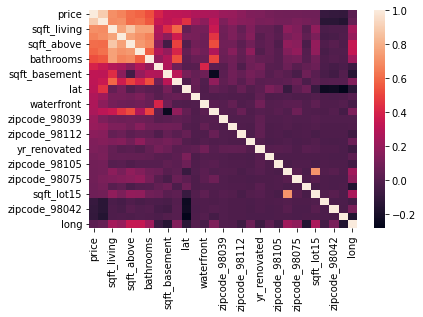

In [153]:
sms.heatmap(df.corr()) #rouge = grosse corelation  #noir = pas de corelation 

<AxesSubplot:>

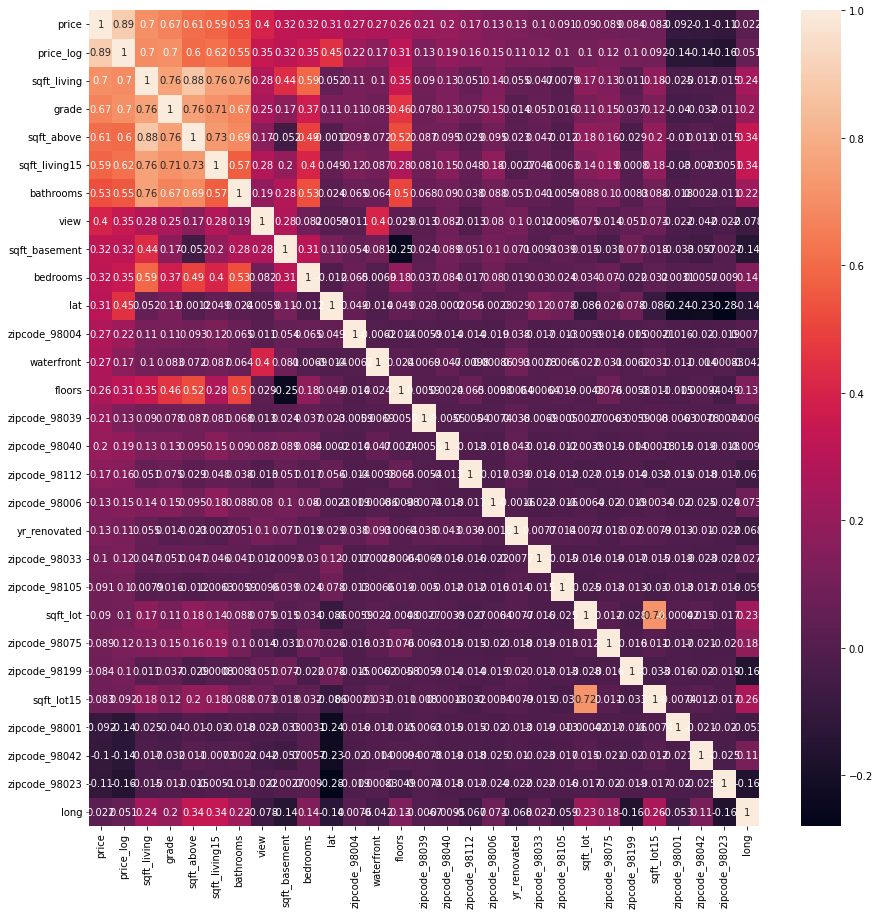

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sms.heatmap(df.corr(), annot=True, ax=ax)

In [155]:
fig = px.density_mapbox(df, lat='lat', lon='long', z='price', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [156]:
import plotly.graph_objects as go
fig2 = go.Figure(go.Densitymapbox(lat=df.lat, lon=df.long, z=df.price,
                                 radius=10))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [157]:
""" from ipython.display import Image Image(filename='federal-way-wa-crime-map.png')

Source: https://prograide.com/pregunta/31980/insertion-dune-image-dans-le-markdown-dun-notebook-ipython """

" from ipython.display import Image Image(filename='federal-way-wa-crime-map.png')\n\nSource: https://prograide.com/pregunta/31980/insertion-dune-image-dans-le-markdown-dun-notebook-ipython "

In [158]:
![alt text](federal-way-wa-crime-map.png "Title")

#ource: https://simonihay.com/fr/federal-way-taux-de-criminalit%C3%A9-wacrime/

/bin/bash: -c: ligne 1: erreur de syntaxe près du symbole inattendu « ( »
/bin/bash: -c: ligne 1: `[alt text](federal-way-wa-crime-map.png "Title")'


In [162]:
df.to_csv("df2.csv") 

In [160]:
# Corrélation price avec le reste :

# df[df.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame()

In [161]:
#Visualisation de la distribution des données numériques à l’aide d’un histogramme :

""" col_num = kc_house_data.describe().columns

col_num2 = kc_house_data.select_dtypes(include=[int, float]).columns

assert col_num.all() == col_num2.all()

col_num

for col in col_num :
   kc_house_data[col].plot(kind='hist')
   plt.yscale('log')
   plt.title('Ceci est un histograme de la colonne : {}'.format(col))
   plt.show() """

" col_num = kc_house_data.describe().columns\n\ncol_num2 = kc_house_data.select_dtypes(include=[int, float]).columns\n\nassert col_num.all() == col_num2.all()\n\ncol_num\n\nfor col in col_num :\n   kc_house_data[col].plot(kind='hist')\n   plt.yscale('log')\n   plt.title('Ceci est un histograme de la colonne : {}'.format(col))\n   plt.show() "